# IDR Download & Timeshift

In [2]:
%matplotlib notebook
import os
import math
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.linear_model import LinearRegression
from collections import deque
from matplotlib import pyplot as plt
import cx_Oracle
from subprocess import Popen, PIPE
import EWX_forecast as ewx

base = 'C:\\Users\\wb5888\\LA-tools\\EWX_Forecast'
data = os.path.join(base, 'csv')
print('working in {}, reading data from {}.'.format(base, data))

working in C:\Users\wb5888\LA-tools\EWX_Forecast, reading data from C:\Users\wb5888\LA-tools\EWX_Forecast\csv.


## Meters to download

### Show directory files

In [65]:
file_df = ewx.sortdir(data, 15)
filenames = file_df.files[1]
filenames

files found in dir:  C:\Users\wb5888\LA-tools\EWX_Forecast\csv
                                   files                time
0                MECO_3840191016_SCA.csv 2019-07-08 09:23:20
1             NEPOOL_MECO_3840191016.csv 2019-07-08 09:22:25
2    NEPOOL_MECO_7655366016_load_adj.csv 2019-07-08 09:12:07
3         NEPOOL_MECO_7655366016_SCA.csv 2019-07-05 14:28:03
4   NEPOOL_MECO_7655366016_timeshift.csv 2019-07-05 14:25:33
5         NEPOOL_MECO_7655366016_val.csv 2019-07-05 14:25:24
6             NEPOOL_MECO_7655366016.csv 2019-07-05 14:23:39
7             NEPOOL_MECO_6351623022.csv 2019-07-05 14:06:11
8             NEPOOL_MECO_1423314042.csv 2019-07-05 14:03:06
9   NEPOOL_MECO_1423314042_timeshift.csv 2019-07-05 13:58:12
10        NEPOOL_MECO_1423314042_val.csv 2019-07-05 13:58:02
11  NEPOOL_MECO_6351623022_timeshift.csv 2019-07-05 13:57:44
12        NEPOOL_MECO_6351623022_val.csv 2019-07-05 13:57:34
13  NEPOOL_MECO_5161473048_timeshift.csv 2019-07-05 13:48:10
14        NEPOOL_MECO_

'NEPOOL_MECO_3840191016.csv'

## Read IDR

## Single Meter

In [80]:
idr = ewx.read_idr(filenames, 0)
idr.head()

,v
t,
2018-05-30 00:00:00,478.88
2018-05-30 01:00:00,466.85
2018-05-30 02:00:00,452.92
2018-05-30 03:00:00,445.05
2018-05-30 04:00:00,459.88


<IPython.core.display.Javascript object>


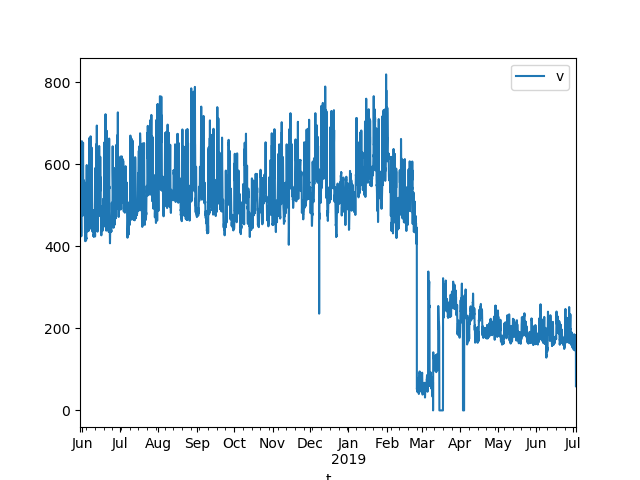

In [67]:
idr.plot(y = 'v')

In [69]:
forecast = ewx.forecast_main(filenames, 1, data, data)

parsing data files...
using filename NEPOOL_MECO_3840191016.csv.
             Time  NEPOOL_MECO_3840191016,1
0  5/30/2018 0:00                    478.88
1  5/30/2018 1:00                    466.85
2  5/30/2018 2:00                    452.92
3  5/30/2018 3:00                    445.05
4  5/30/2018 4:00                    459.88
read NEPOOL_MECO_3840191016.csv from C:\Users\wb5888\LA-tools\EWX_Forecast\csv.
running data validations...
...
...
...
...
...
usage validated.
running usage estimation flags...


C:\Users\wb5888\LA-tools\EWX_Forecast\EWX_forecast.py:474: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tmp2.lin[tmp2.lin.isnull()] = tmp2.v[tmp2.lin.isnull()]


writing validated usage file to .csv...
wrote NEPOOL_MECO_3840191016.csv to C:\Users\wb5888\LA-tools\EWX_Forecast\csv.
forecasting...


C:\Users\wb5888\LA-tools\EWX_Forecast\EWX_forecast.py:368: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  master = pd.concat([year_data, future], axis = 0)


forecasted year 0 of 2 with 8757 reads.


C:\Users\wb5888\LA-tools\EWX_Forecast\EWX_forecast.py:380: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  master = pd.concat([master, forecast], axis = 0)


forecasted year 1 of 2 with 8736 reads.
writing forecasts to .csv...
wrote NEPOOL_MECO_3840191016_timeshift.csv to C:\Users\wb5888\LA-tools\EWX_Forecast\csv.


In [6]:
forecast.plot(y = 'lin')

In [7]:
first_yr = [(yr.year == 2019) for yr in forecast.index]
forecast[first_yr].plot(y = 'v')

# Check Scalar

In [70]:
filedf = ewx.sortdir(data, 10)

files found in dir:  C:\Users\wb5888\LA-tools\EWX_Forecast\csv
                                  files                time
0  NEPOOL_MECO_3840191016_timeshift.csv 2019-07-08 09:24:22
1        NEPOOL_MECO_3840191016_val.csv 2019-07-08 09:24:21
2               MECO_3840191016_SCA.csv 2019-07-08 09:23:20
3            NEPOOL_MECO_3840191016.csv 2019-07-08 09:22:25
4   NEPOOL_MECO_7655366016_load_adj.csv 2019-07-08 09:12:07
5        NEPOOL_MECO_7655366016_SCA.csv 2019-07-05 14:28:03
6  NEPOOL_MECO_7655366016_timeshift.csv 2019-07-05 14:25:33
7        NEPOOL_MECO_7655366016_val.csv 2019-07-05 14:25:24
8            NEPOOL_MECO_7655366016.csv 2019-07-05 14:23:39
9            NEPOOL_MECO_6351623022.csv 2019-07-05 14:06:11


In [71]:
myfile = filedf.files[1]
myfile
val = pd.read_csv(myfile, header = 0, index_col = 0)
val.index = pd.to_datetime(val.index)
print(val.head())
print(val.tail())

                          v  d  h        pz     lr  mon     vd   td    gap  \
2018-05-30 00:00:00  478.88  2  0  0.000000  False    5   0.00  1.0  False   
2018-05-30 01:00:00  466.85  2  1  0.000000  False    5 -12.03  1.0  False   
2018-05-30 02:00:00  452.92  2  2  0.017241   True    5 -13.93  1.0  False   
2018-05-30 03:00:00  445.05  2  3  0.017544   True    5  -7.87  1.0  False   
2018-05-30 04:00:00  459.88  2  4  0.017544   True    5  14.83  1.0  False   

                             rm  ...        var  spike    dip    dst  min  \
2018-05-30 00:00:00  497.165056  ...   3.627298  False  False  False    0   
2018-05-30 01:00:00  497.217895  ...   6.772721  False  False  False    0   
2018-05-30 02:00:00  497.242818  ...  10.392959  False  False  False    0   
2018-05-30 03:00:00  497.282039  ...  12.533180  False  False  False    0   
2018-05-30 04:00:00  497.306236  ...   8.736612  False  False  False    0   

                     date_zip     na    err  interp       lin  
2018

In [72]:
val['y'] = [a.year for a in val.index]
val.head()

,v,d,h,pz,lr,mon,vd,td,gap,rm,...,spike,dip,dst,min,date_zip,na,err,interp,lin,y
2018-05-30 00:00:00,478.88,2,0,0.000000,False,5,0.00,1.0,False,497.165056,...,False,False,False,0,"(2, 0)",False,False,478.88,478.8800,2018
2018-05-30 01:00:00,466.85,2,1,0.000000,False,5,-12.03,1.0,False,497.217895,...,False,False,False,0,"(2, 1)",False,False,466.85,466.8500,2018
2018-05-30 02:00:00,452.92,2,2,0.017241,True,5,-13.93,1.0,False,497.242818,...,False,False,False,0,"(2, 2)",False,True,NaN,465.1628,2018
2018-05-30 03:00:00,445.05,2,3,0.017544,True,5,-7.87,1.0,False,497.282039,...,False,False,False,0,"(2, 3)",False,True,NaN,463.4756,2018
2018-05-30 04:00:00,459.88,2,4,0.017544,True,5,14.83,1.0,False,497.306236,...,False,False,False,0,"(2, 4)",False,True,NaN,461.7884,2018


In [81]:
#forecast = pd.DataFrame(forecast)
idr['y'] = [a.year for a in idr.index]
idr['m'] = [a.month for a in idr.index]
scalar = pd.DataFrame(idr['v'].groupby([idr.y, idr.m]).sum())
scalar

v
y    m            
2018 5    24825.04
     6   364170.73
     7   400953.84
     8   416393.37
     9   375742.76
     10  377553.00
     11  386431.00
     12  408211.77
2019 1   431159.69
     2   303207.36
     3   120250.22
     4   148217.76
     5   141391.11
     6   134142.93
     7     8272.84

In [75]:
act_scalar = pd.read_csv(filedf.files[2], header = 0, index_col = 0)
act_scalar['Start Date'] = pd.to_datetime(act_scalar['Start Date'])
act_scalar['Stop Date'] = pd.to_datetime(act_scalar['Stop Date'])


act_scalar['Mon'] = [m.month for m in act_scalar['Stop Date']]
act_scalar['Yr'] = [y.year for y in act_scalar['Stop Date']]


base_scalar = act_scalar[['Usage', 'Mon', 'Yr']].reset_index(drop = True)
base_scalar['Usage'] = [a.replace(',', '') for a in base_scalar.Usage]
base_scalar['Usage'] = pd.to_numeric(base_scalar['Usage'])

base_scalar.set_index(['Yr', 'Mon'], drop = True, inplace = True)
base_scalar.index.names = ['y', 'm']

In [76]:
comb_scalar = base_scalar.join(scalar, how = 'left')
recent = [a[0] >= 2018 for a in comb_scalar.index]
nonmiss = comb_scalar.v.notnull()
use = [a and b for a, b in zip(recent, nonmiss)]
comb_scalar = comb_scalar[use]
comb_scalar

Usage          v
y    m                    
2018 5   354899   24825.04
     6   393201  364170.73
     7   370711  400953.84
     8   405024  416393.37
     9   398287  375742.76
     10  352796  377553.00
     10  361480  377553.00
     12  425455  408211.77
2019 1   432166  431159.69
     2   413026  303207.36
     3   397191  120250.22
     4   380019  148217.76
     5   378103  141391.11

In [77]:
comb_scalar['ratio'] = [b/a for a, b in zip(comb_scalar.v, comb_scalar.Usage)]
comb_scalar

Usage          v      ratio
y    m                               
2018 5   354899   24825.04  14.296009
     6   393201  364170.73   1.079716
     7   370711  400953.84   0.924573
     8   405024  416393.37   0.972696
     9   398287  375742.76   1.059999
     10  352796  377553.00   0.934428
     10  361480  377553.00   0.957428
     12  425455  408211.77   1.042241
2019 1   432166  431159.69   1.002334
     2   413026  303207.36   1.362190
     3   397191  120250.22   3.303038
     4   380019  148217.76   2.563924
     5   378103  141391.11   2.674164

In [82]:
idr['date_zip'] = [(a,b) for a, b in zip(idr.y, idr.m)]
idr['date'] = pd.to_datetime(idr.index.to_series())
#comb_scalar['date_zip'] = zip(comb_scalar.index.y, comb_scalar.index.m)
comb_scalar['date_zip'] = comb_scalar.index.to_series()
print(comb_scalar.head())
sub_scalar = comb_scalar[['ratio', 'date_zip']]
sub_scalar

         Usage          v      ratio   date_zip
y    m                                         
2018 5  354899   24825.04  14.296009  (2018, 5)
     6  393201  364170.73   1.079716  (2018, 6)
     7  370711  400953.84   0.924573  (2018, 7)
     8  405024  416393.37   0.972696  (2018, 8)
     9  398287  375742.76   1.059999  (2018, 9)


ratio    date_zip
y    m                        
2018 5   14.296009   (2018, 5)
     6    1.079716   (2018, 6)
     7    0.924573   (2018, 7)
     8    0.972696   (2018, 8)
     9    1.059999   (2018, 9)
     10   0.934428  (2018, 10)
     10   0.957428  (2018, 10)
     12   1.042241  (2018, 12)
2019 1    1.002334   (2019, 1)
     2    1.362190   (2019, 2)
     3    3.303038   (2019, 3)
     4    2.563924   (2019, 4)
     5    2.674164   (2019, 5)

In [87]:
idr_new = pd.merge(idr, sub_scalar, how = 'left', on = 'date_zip')
idr_new.set_index('date', inplace = True, drop = True)
ratio_mu = np.mean(idr_new.ratio[idr_new.ratio.notnull()])


In [88]:
idr_new['ratio'][idr_new.ratio.isnull()] = ratio_mu

c:\users\wb5888\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [89]:
idr_new['adj'] = [a*b for a, b in zip(idr_new.ratio, idr_new.v)]
idr_new.head()

,v,y,m,date_zip,ratio,adj
date,,,,,,
2018-05-30 00:00:00,478.88,2018,5,"(2018, 5)",14.296009,6846.072881
2018-05-30 01:00:00,466.85,2018,5,"(2018, 5)",14.296009,6674.091891
2018-05-30 02:00:00,452.92,2018,5,"(2018, 5)",14.296009,6474.948483
2018-05-30 03:00:00,445.05,2018,5,"(2018, 5)",14.296009,6362.438890
2018-05-30 04:00:00,459.88,2018,5,"(2018, 5)",14.296009,6574.448707


<IPython.core.display.Javascript object>


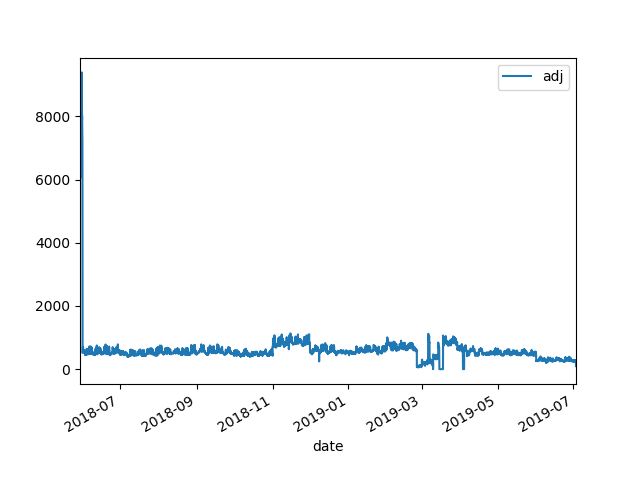

In [90]:
idr_new.plot(y = 'adj')

<IPython.core.display.Javascript object>


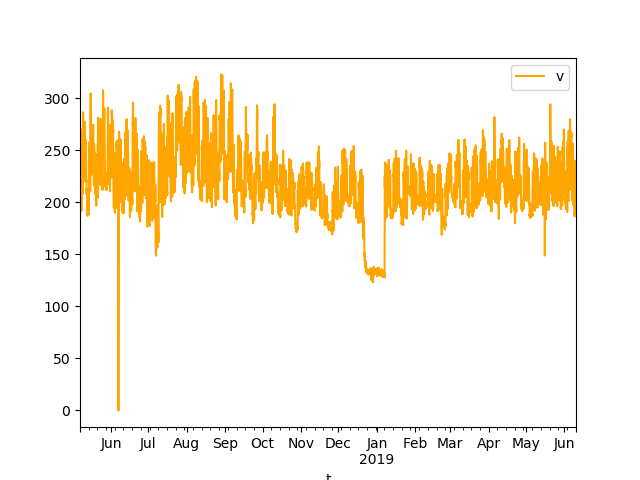

In [58]:
idr.plot(y = 'v', color = 'orange')

In [91]:
idr_new.to_csv('NEPOOL_MECO_3840191016_load_adj.csv')

In [119]:
month = [x.month for x in forecast.index]
forecast['mon'] = month
comp['adj_sca'] = forecast['load_adjust'].groupby(forecast['mon']).sum()
comp['adj_ratio'] = [b/a for a,b in zip(comp.adj_sca, comp.act)]
comp

,v,act,ratio,adj_sca,adj_ratio
mon,,,,,
1,518103.648,82080.0,0.158424,85544.907579,0.959496
2,472444.272,82240.0,0.174073,87197.558572,0.943146
3,424150.848,88000.0,0.207473,113952.003981,0.772255
4,577214.736,86880.0,0.150516,89617.615392,0.969452
5,554084.352,77920.0,0.140628,95586.882766,0.815175
6,592658.256,NaN,NaN,92233.194802,NaN
7,647121.072,NaN,NaN,97706.175798,NaN
8,601566.384,NaN,NaN,97073.380248,NaN
9,523312.080,NaN,NaN,86513.117803,NaN


## Multiple Meters

In [19]:
meter_data = []

for m in filenames:
    meter = m.split('.')[0]
    idr = ewx.read_idr(m, None)
    meter_data.append((meter, idr))

meter_data = dict(meter_data)
print('read data into dict w/ {} elements.'.format(len(meter_data.keys())))

read data into dict w/ 0 elements.


### Merge data

In [19]:
master = ewx.merge_idr(meter_data)
master.fillna(.123456789, inplace = True)

                     NEPOOL_NRI_0368442004  NEPOOL_NRI_6398155001  \
t                                                                   
2016-10-12 00:00:00                    NaN                 462.05   
2016-10-12 01:00:00                    NaN                 470.45   
2016-10-12 02:00:00                    NaN                 490.95   
2016-10-12 03:00:00                    NaN                 482.95   
2016-10-12 04:00:00                    NaN                 494.35   

                     NEPOOL_PSNH_80006750394  NEPOOL_PSNH_80050160227  
t                                                                      
2016-10-12 00:00:00                      NaN                      NaN  
2016-10-12 01:00:00                      NaN                      NaN  
2016-10-12 02:00:00                      NaN                      NaN  
2016-10-12 03:00:00                      NaN                      NaN  
2016-10-12 04:00:00                      NaN                      NaN  


### Plot IDR

graphing forecasts...


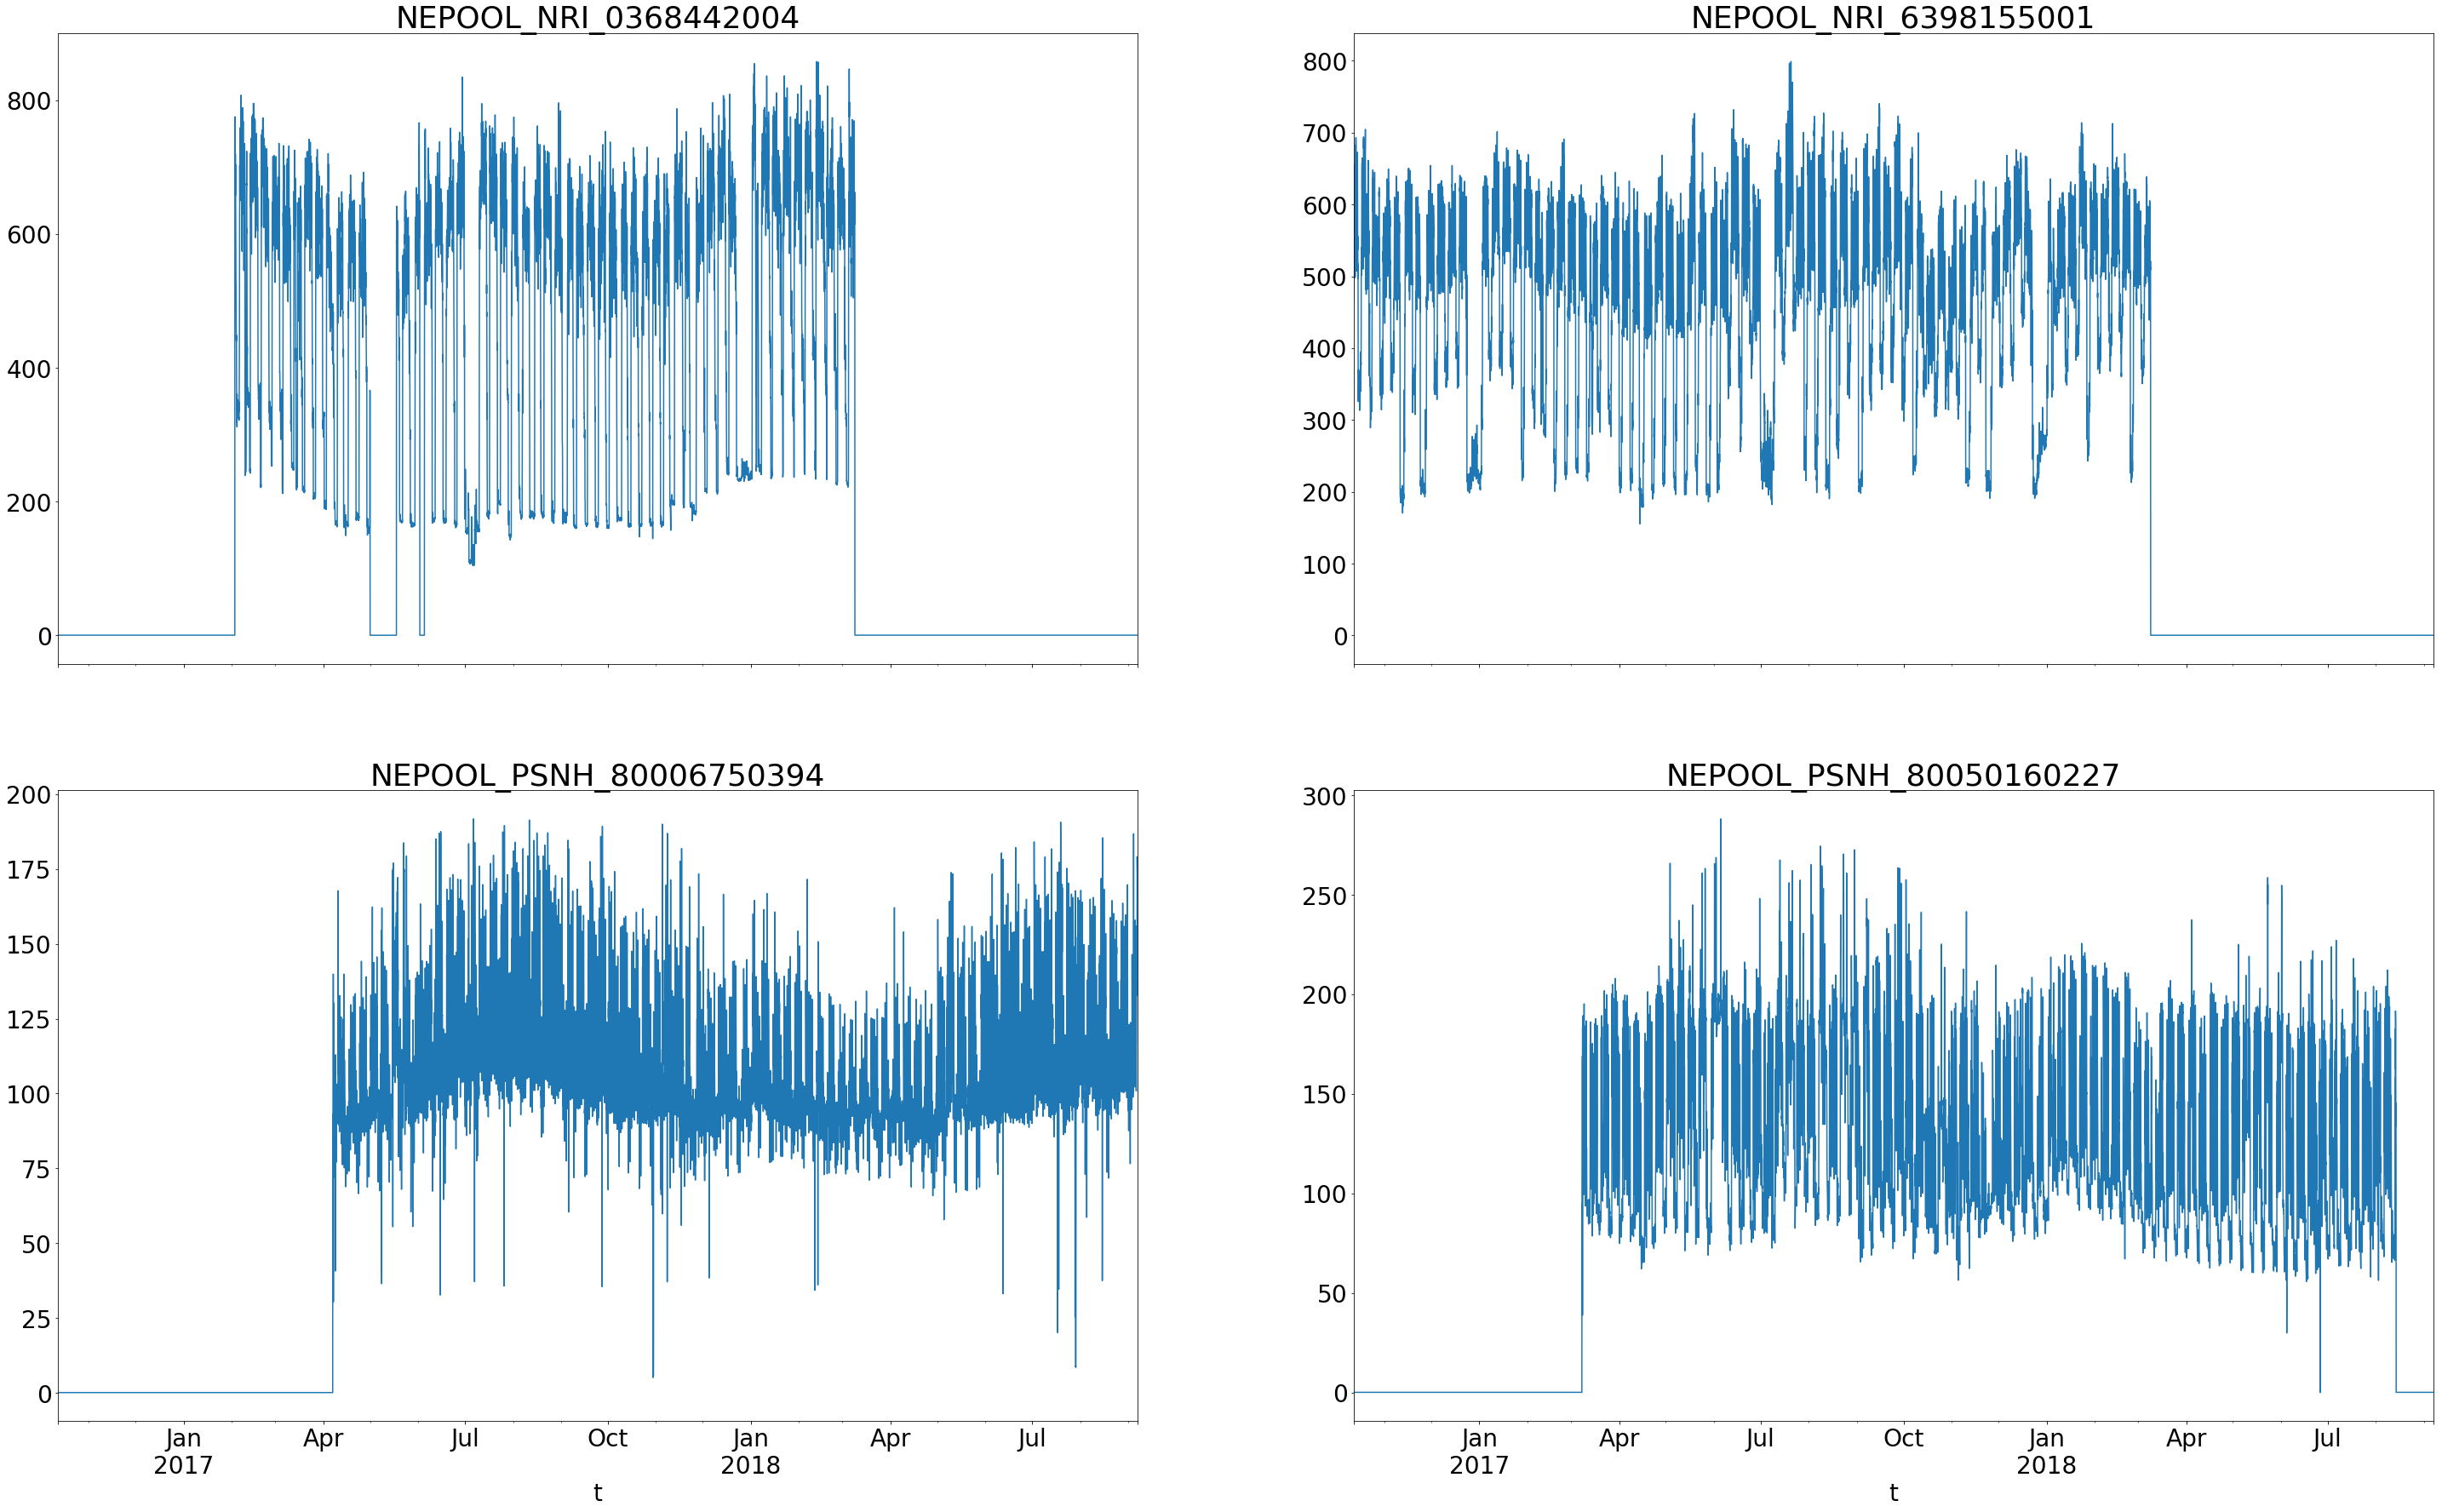

In [20]:
ewx.iter_plot(master)

## Timeshift

In [21]:
for files in filenames:
    try:
        ch1 = ewx.forecast_main(files, 4, data, data)
    
    except:
        print('error with {}.'.format(files))

parsing data files...
using filename NEPOOL_NRI_0368442004.csv.
   2/3/2017 0:00  775.35
0  2/3/2017 1:00  763.85
1  2/3/2017 2:00  685.85
2  2/3/2017 3:00  659.25
3  2/3/2017 4:00   692.9
4  2/3/2017 5:00  683.95
read NEPOOL_NRI_0368442004.csv from C:\Users\wb5888\LA-tools\EWX_Forecast\csv.
running data validations...
...
...
...
...
...
usage validated.
running usage estimation flags...
writing validated usage file to .csv...


C:\Users\wb5888\LA-tools\EWX_Forecast\EWX_forecast.py:474: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tmp2.lin[tmp2.lin.isnull()] = tmp2.v[tmp2.lin.isnull()]


wrote NEPOOL_NRI_0368442004.csv to C:\Users\wb5888\LA-tools\EWX_Forecast\csv.
forecasting...


C:\Users\wb5888\LA-tools\EWX_Forecast\EWX_forecast.py:368: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  master = pd.concat([year_data, future], axis = 0)


forecasted year 0 of 5 with 8736 reads.


C:\Users\wb5888\LA-tools\EWX_Forecast\EWX_forecast.py:380: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  master = pd.concat([master, forecast], axis = 0)


forecasted year 1 of 5 with 8736 reads.
forecasted year 2 of 5 with 8736 reads.
forecasted year 3 of 5 with 8736 reads.
forecasted year 4 of 5 with 8736 reads.
writing forecasts to .csv...
wrote NEPOOL_NRI_0368442004_timeshift.csv to C:\Users\wb5888\LA-tools\EWX_Forecast\csv.
parsing data files...
using filename NEPOOL_NRI_6398155001.csv.
   10/12/2016 0:00  462.05
0  10/12/2016 1:00  470.45
1  10/12/2016 2:00  490.95
2  10/12/2016 3:00  482.95
3  10/12/2016 4:00  494.35
4  10/12/2016 5:00  521.50
read NEPOOL_NRI_6398155001.csv from C:\Users\wb5888\LA-tools\EWX_Forecast\csv.
running data validations...
...
...
...
...
...
usage validated.
running usage estimation flags...
writing validated usage file to .csv...
wrote NEPOOL_NRI_6398155001.csv to C:\Users\wb5888\LA-tools\EWX_Forecast\csv.
forecasting...
forecasted year 0 of 5 with 8736 reads.
forecasted year 1 of 5 with 8736 reads.
forecasted year 2 of 5 with 8736 reads.
forecasted year 3 of 5 with 8736 reads.
forecasted year 4 of 5 wit

### Read in timeshifts

In [23]:
file_df = ewx.sortdir(data, 15)
file_df

files found in dir:  C:\Users\wb5888\LA-tools\EWX_Forecast\csv
                                    files                time
0   NEPOOL_PSNH_80050160227_timeshift.csv 2019-06-28 13:29:35
1         NEPOOL_PSNH_80050160227_val.csv 2019-06-28 13:29:32
2   NEPOOL_PSNH_80006750394_timeshift.csv 2019-06-28 13:29:29
3         NEPOOL_PSNH_80006750394_val.csv 2019-06-28 13:29:27
4     NEPOOL_NRI_6398155001_timeshift.csv 2019-06-28 13:29:24
5           NEPOOL_NRI_6398155001_val.csv 2019-06-28 13:29:22
6     NEPOOL_NRI_0368442004_timeshift.csv 2019-06-28 13:29:19
7           NEPOOL_NRI_0368442004_val.csv 2019-06-28 13:29:17
8               NEPOOL_NRI_0368442004.csv 2019-06-28 13:08:04
9               NEPOOL_NRI_6398155001.csv 2019-06-28 13:07:53
10            NEPOOL_PSNH_80006750394.csv 2019-06-28 13:07:46
11            NEPOOL_PSNH_80050160227.csv 2019-06-28 13:07:16
12    NEPOOL_NRI_9111788007_timeshift.csv 2019-06-28 09:17:36
13          NEPOOL_NRI_9111788007_val.csv 2019-06-28 09:17:34
14    N

,files,time
0,NEPOOL_PSNH_80050160227_timeshift.csv,2019-06-28 13:29:35
1,NEPOOL_PSNH_80050160227_val.csv,2019-06-28 13:29:32
2,NEPOOL_PSNH_80006750394_timeshift.csv,2019-06-28 13:29:29
3,NEPOOL_PSNH_80006750394_val.csv,2019-06-28 13:29:27
4,NEPOOL_NRI_6398155001_timeshift.csv,2019-06-28 13:29:24
5,NEPOOL_NRI_6398155001_val.csv,2019-06-28 13:29:22
6,NEPOOL_NRI_0368442004_timeshift.csv,2019-06-28 13:29:19
7,NEPOOL_NRI_0368442004_val.csv,2019-06-28 13:29:17
8,NEPOOL_NRI_0368442004.csv,2019-06-28 13:08:04
9,NEPOOL_NRI_6398155001.csv,2019-06-28 13:07:53


In [24]:
index = [0, 2, 4, 6]
filenames = list(file_df.files[index])
filenames

['NEPOOL_PSNH_80050160227_timeshift.csv',
 'NEPOOL_PSNH_80006750394_timeshift.csv',
 'NEPOOL_NRI_6398155001_timeshift.csv',
 'NEPOOL_NRI_0368442004_timeshift.csv']

datetime.datetime(2019, 5, 31, 0, 0, 0, 751280)

In [33]:
ts_data = []
td = dt.datetime.today() 
diff = dt.timedelta(days = td.day, hours = td.hour, minutes = td.minute, seconds = td.second)
cutoff = td - diff
cutoff

for m in filenames:
    print('reading meter {}'.format(m))
    meter = m.split('.')[0]
    
    try:
        idr = ewx.read_idr(m, None)
        idr.columns = [m]
        idr.fillna(.123456789, inplace = True)
        idr = idr.loc[idr.index <= cutoff,:]
        ts_data.append((meter, idr))
    
    except:
        print('error with meter.'.format(m))

ts_data = dict(ts_data)
print('read data into dict w/ {} elements.'.format(len(ts_data.keys())))
datasets = list(ts_data.keys())

reading meter NEPOOL_PSNH_80050160227_timeshift.csv
reading meter NEPOOL_PSNH_80006750394_timeshift.csv
reading meter NEPOOL_NRI_6398155001_timeshift.csv
reading meter NEPOOL_NRI_0368442004_timeshift.csv
read data into dict w/ 4 elements.


In [34]:
ts_master = ewx.merge_idr(ts_data)
ts_master.fillna(.123456789, inplace = True)

                     NEPOOL_PSNH_80050160227_timeshift  \
t                                                        
2017-03-09 00:00:00                                NaN   
2017-03-09 01:00:00                                NaN   
2017-03-09 02:00:00                                NaN   
2017-03-09 03:00:00                                NaN   
2017-03-09 04:00:00                                NaN   

                     NEPOOL_PSNH_80006750394_timeshift  \
t                                                        
2017-03-09 00:00:00                                NaN   
2017-03-09 01:00:00                                NaN   
2017-03-09 02:00:00                                NaN   
2017-03-09 03:00:00                                NaN   
2017-03-09 04:00:00                                NaN   

                     NEPOOL_NRI_6398155001_timeshift  \
t                                                      
2017-03-09 00:00:00                           482.95   
2017-03-09 01:00:0

In [35]:
shift_yr = [a.year > 2017 for a in ts_master.index]
ts_master[shift_yr].head()

,NEPOOL_PSNH_80050160227_timeshift,NEPOOL_PSNH_80006750394_timeshift,NEPOOL_NRI_6398155001_timeshift,NEPOOL_NRI_0368442004_timeshift
t,,,,
2018-01-01 00:00:00,91.200001,98.349998,278.25,241.35
2018-01-01 01:00:00,90.000000,98.550003,280.65,245.45
2018-01-01 02:00:00,88.400002,95.850002,277.30,243.35
2018-01-01 03:00:00,88.400002,99.500000,282.65,245.20
2018-01-01 04:00:00,86.200001,99.799999,278.25,244.60


### Plot timeshifts

graphing forecasts...


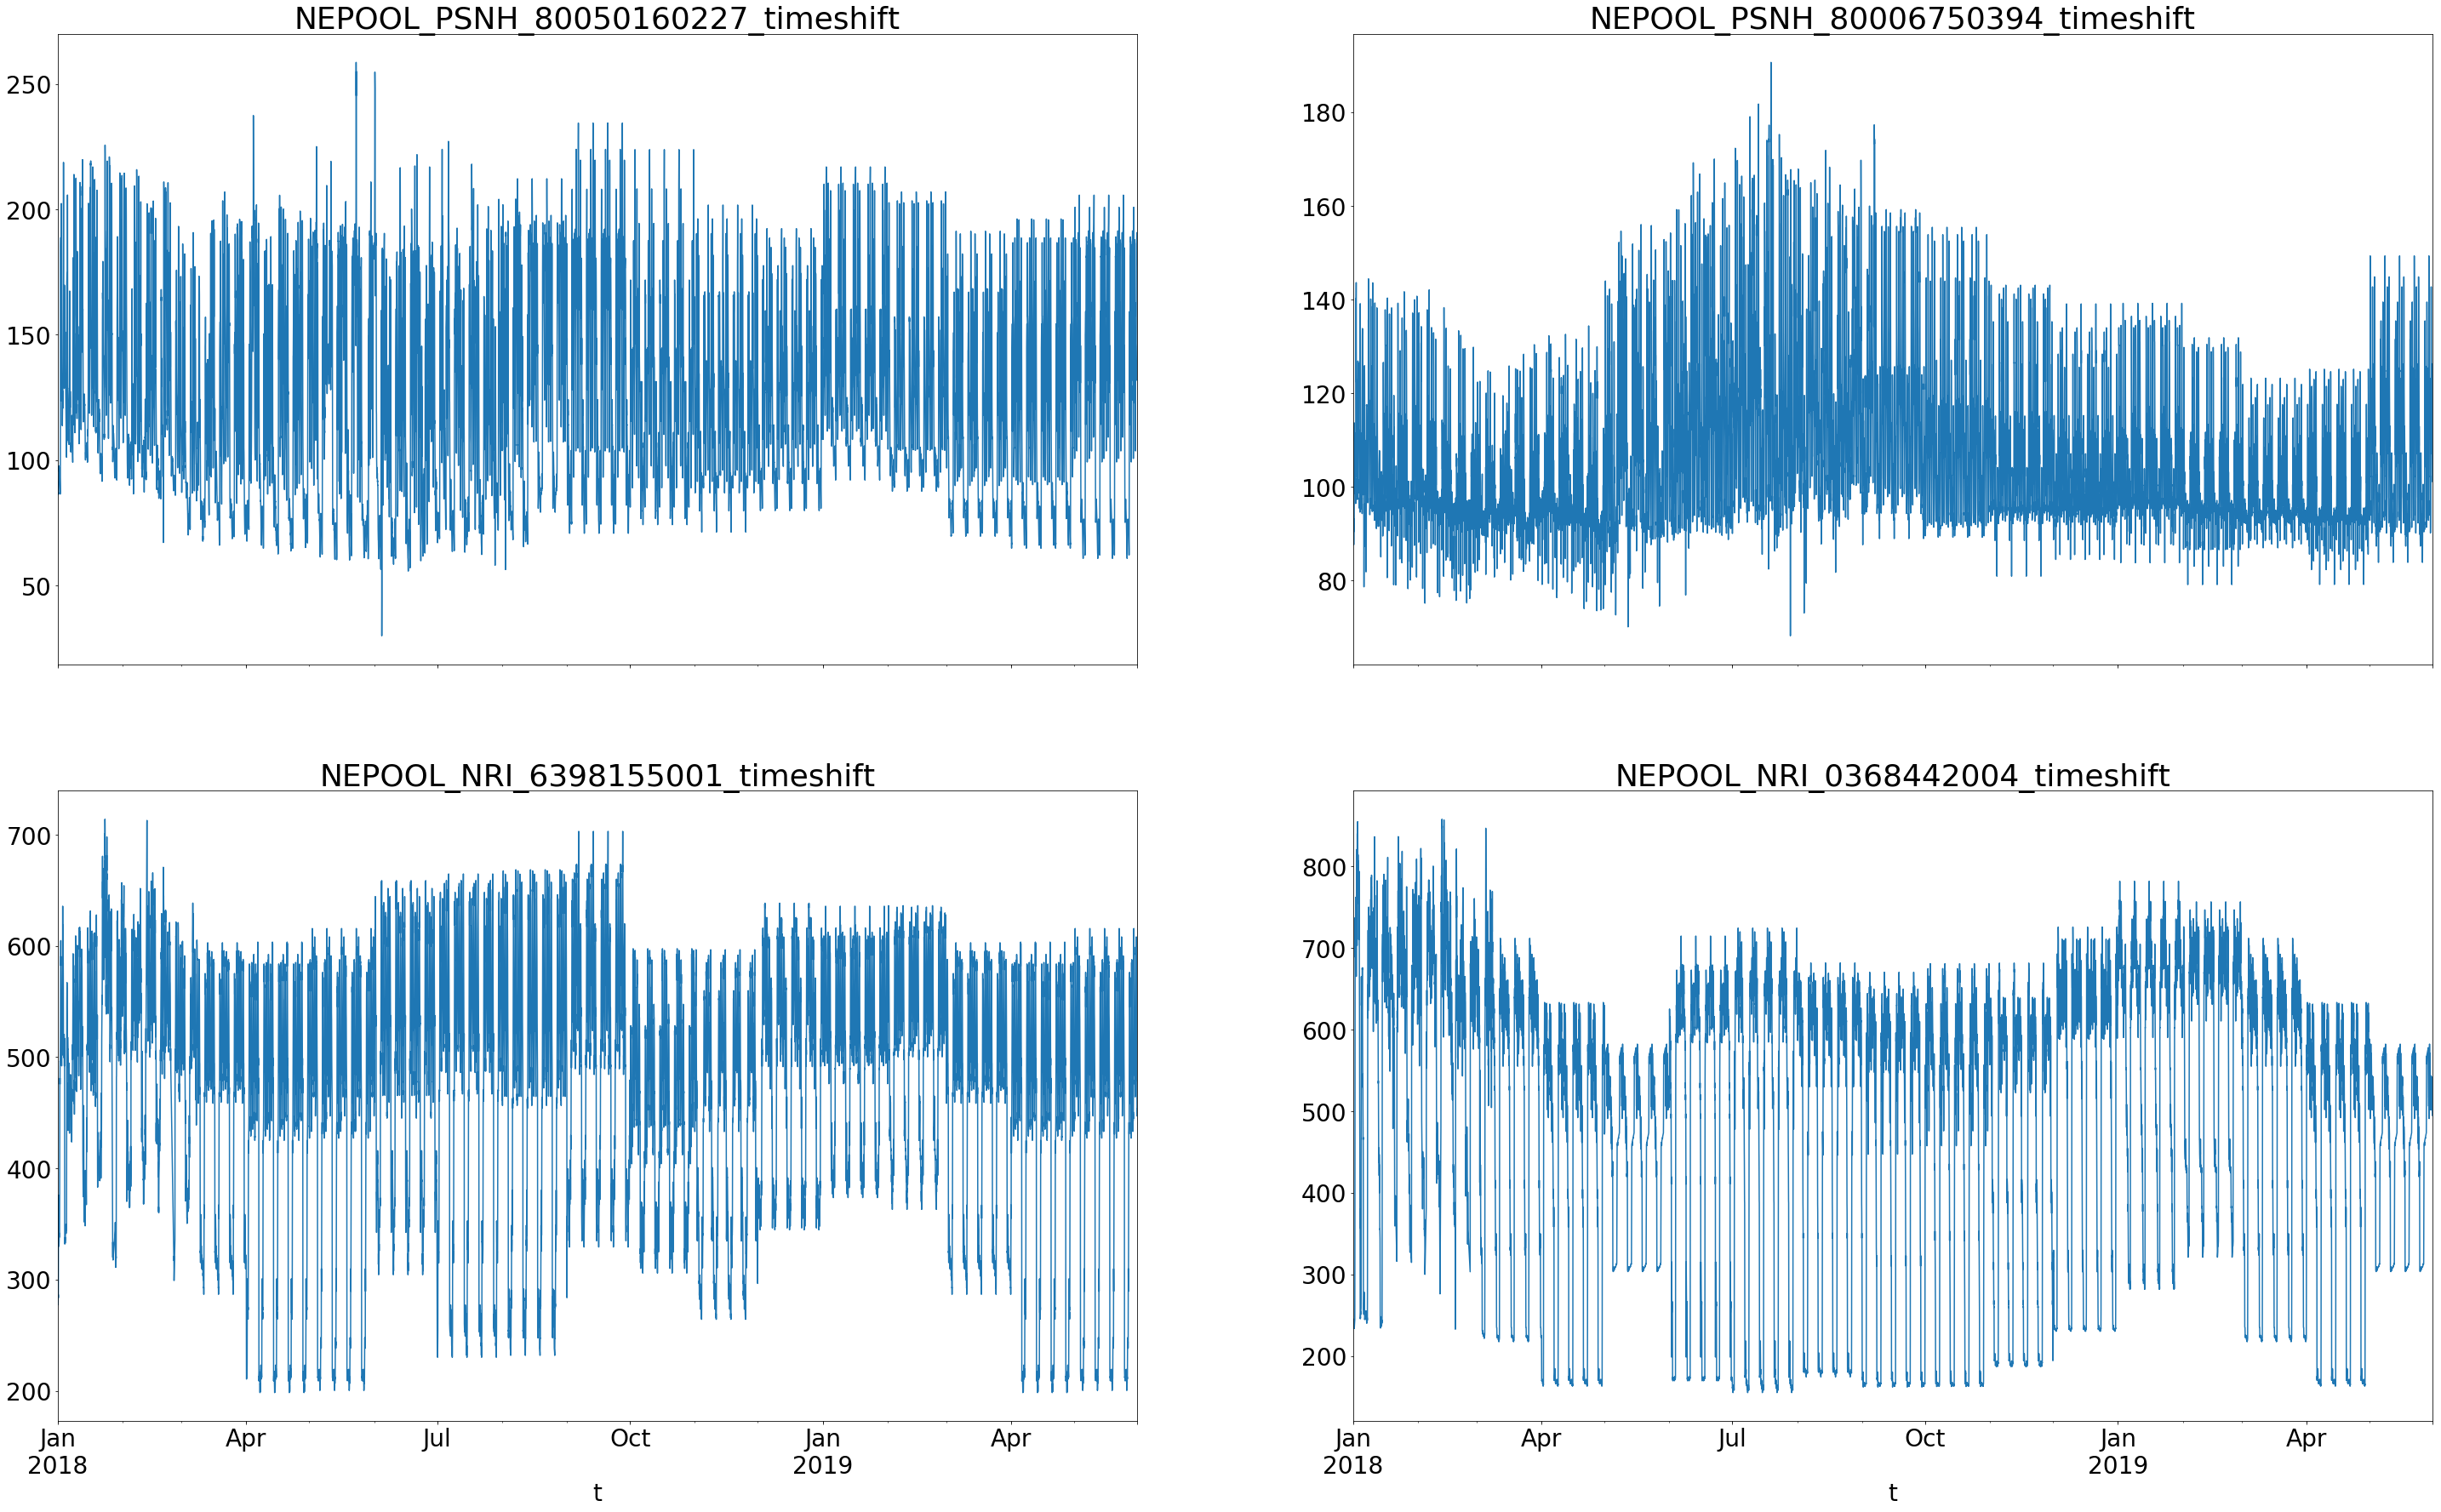

In [36]:
ewx.iter_plot(ts_master[shift_yr])

## Export final timeshifts

In [42]:
os.getcwd()

'C:\\Users\\wb5888\\LA-tools\\EWX_Forecast\\csv'

In [41]:
for meter, data in ts_data.items():
    filename = '.'.join([meter, 'csv'])
    print('writing {} to disk.'.format(filename))
    #print(data.head())
    #print('...')
    #print(data.tail())
    data.to_csv(filename)

writing NEPOOL_PSNH_80050160227_timeshift.csv to disk.
                     NEPOOL_PSNH_80050160227_timeshift.csv
t                                                         
2017-08-14 00:00:00                              98.099998
2017-08-14 01:00:00                              95.400002
2017-08-14 02:00:00                              96.100002
2017-08-14 03:00:00                              90.500000
2017-08-14 04:00:00                              89.600002
...
                     NEPOOL_PSNH_80050160227_timeshift.csv
t                                                         
2019-05-30 20:00:00                             188.600006
2019-05-30 21:00:00                             190.699997
2019-05-30 22:00:00                             189.900002
2019-05-30 23:00:00                             184.200005
2019-05-31 00:00:00                             178.000004
writing NEPOOL_PSNH_80006750394_timeshift.csv to disk.
                     NEPOOL_PSNH_80006750394_timeshift.csv
t